# 두피 미세각질

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Input, Rescaling
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [11]:
num_classes = 5
model_name = 'efficientnet-b7'

train_name = 'model1'

In [12]:

# 모델 가중치를 저장할 경로
PATH = './scalp_weights/'

# 데이터셋 경로 설정
train_name = 'model1'
data_train_path = './train_data/' + train_name + '/train'
data_validation_path = './train_data/' + train_name + '/validation'
data_test_path = './train_data/' + train_name + '/test'

# 이미지 크기 설정 (예시로 224x224 사용)
image_size = (224, 224)
num_classes = 5# 클래스의 개수

# 데이터 로더 설정
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = datagen.flow_from_directory(
    data_train_path,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    data_validation_path,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 12739 images belonging to 5 classes.
Found 3639 images belonging to 5 classes.


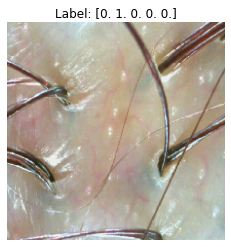

In [13]:
import matplotlib.pyplot as plt

# 데이터셋 로더로부터 배치 데이터 가져오기
batch_images, batch_labels = next(validation_generator)

# 가져온 배치 데이터의 첫 번째 이미지와 라벨 확인
sample_image = batch_images[0]
sample_label = batch_labels[0]

# 이미지 시각화
plt.imshow(sample_image)
plt.title(f"Label: {sample_label}")
plt.axis('off')  # 축 제거
plt.show()

In [14]:

# EfficientNet B7 모델 로딩 (include_top=False로 설정하여 마지막 fully connected layer를 제외합니다)
base_model = EfficientNetB7(include_top=False, weights='imagenet', input_shape=(224, 224, 3))


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.364341 to fit



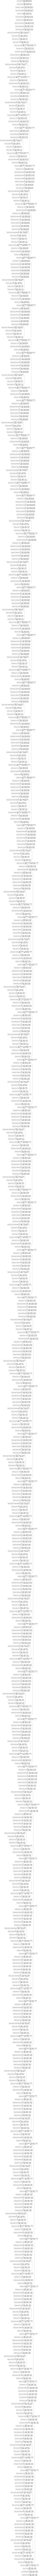

In [15]:
from tensorflow.keras.utils import plot_model

# 모델 구조 시각화
plot_model(base_model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

In [16]:

# 입력 데이터 정규화 레이어 추가
inputs = Input(shape=(224, 224, 3))
normalized_inputs = Rescaling(scale=1.0/255.0)(inputs)
x = base_model(normalized_inputs)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)


In [17]:

# 전체 모델 생성
model = Model(inputs=inputs, outputs=predictions)


In [18]:

# EfficientNet의 기존 가중치는 고정하고 새로 추가한 레이어만 학습되도록 설정
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

Epoch 1/10
398/398 [==============================] - 259s 611ms/step - loss: 1.2558 - accuracy: 0.3963 - val_loss: 1.1932 - val_accuracy: 0.4336
Epoch 2/10
398/398 [==============================] - 185s 464ms/step - loss: 1.1862 - accuracy: 0.4203 - val_loss: 1.1730 - val_accuracy: 0.4336
Epoch 3/10
398/398 [==============================] - 185s 465ms/step - loss: 1.1765 - accuracy: 0.4279 - val_loss: 1.1751 - val_accuracy: 0.4336
Epoch 4/10
398/398 [==============================] - 185s 465ms/step - loss: 1.1773 - accuracy: 0.4308 - val_loss: 1.1689 - val_accuracy: 0.4336
Epoch 5/10
398/398 [==============================] - 185s 464ms/step - loss: 1.1765 - accuracy: 0.4299 - val_loss: 1.1693 - val_accuracy: 0.4336
Epoch 6/10
398/398 [==============================] - 185s 464ms/step - loss: 1.1741 - accuracy: 0.4309 - val_loss: 1.1682 - val_accuracy: 0.4336
Epoch 7/10
398/398 [==============================] - 185s 464ms/step - loss: 1.1765 - accuracy: 0.4328 - val_loss: 1.1754 -

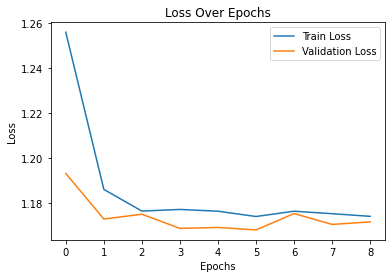

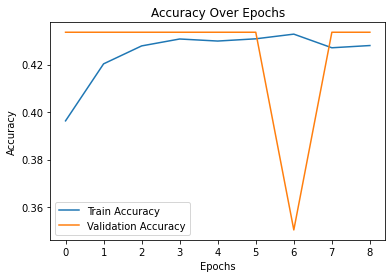

In [19]:

# 학습 과정 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.show()

In [20]:

# 테스트 데이터셋 로딩
test_generator = datagen.flow_from_directory(
    test_data_path,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 테스트 데이터셋으로 모델 평가
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}"

SyntaxError: unexpected EOF while parsing (2742382581.py, line 12)